In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

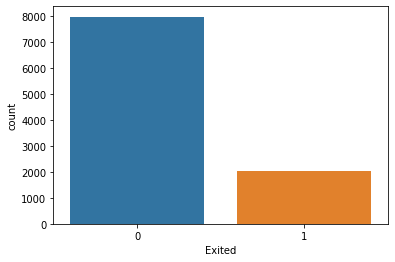

In [8]:
sns.countplot(data['Exited'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(data['Geography'].value_counts())
data['Geography']=le.fit_transform(data['Geography'])
print(data['Geography'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
0    5014
1    2509
2    2477
Name: Geography, dtype: int64


In [10]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
print(data['Gender'].value_counts())
data['Gender']=data['Gender'].replace(['Male','Female'],[1,0])
print(data['Gender'].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64
1    5457
0    4543
Name: Gender, dtype: int64


In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# feature scaling

In [13]:
x=data.iloc[:,0:10]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [14]:
y=data.iloc[:,[10]]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [17]:
y_test[:8]

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
8225,1
5506,0
6451,0


In [18]:
y_pred=logr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[1553,  380],
       [  42,   25]], dtype=int64)

In [20]:
# overcome unbalanced data
# feature selection
# confusion matrix
# overfitting and underfitting
# scaling

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1933
           1       0.06      0.37      0.11        67

    accuracy                           0.79      2000
   macro avg       0.52      0.59      0.49      2000
weighted avg       0.94      0.79      0.85      2000



#### Imbalanced data to balanced data

In [ ]:
i) under sampling
ii) over sampling

#### Under Sampling

In [26]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
1 - 7963
0 - 2037

In [27]:
data_class_0=data[data['Exited']==0]
data_class_1=data[data['Exited']==1]

In [28]:
print(data_class_0.shape)
print(data_class_1.shape)

(7963, 11)
(2037, 11)


In [29]:
data_class_0_under=data_class_0.sample(2037) # sample is used for getting the random records

In [30]:
print(data_class_0_under.shape)

(2037, 11)


In [32]:
data_under=pd.concat([data_class_0_under,data_class_1],axis=0)
print(data_under.shape)

(4074, 11)


In [33]:
data_under['Exited'].value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

#### TASK

In [ ]:
# hint
# .sample(7963,resample=True)

In [36]:
data_under.shape

(4074, 11)

In [38]:
x=data_under.iloc[:,0:10]
y=data_under.iloc[:,[10]]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [40]:
from sklearn.linear_model import LogisticRegression
logrunder=LogisticRegression()
logrunder.fit(x_train,y_train)

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
y_pred=logrunder.predict(x_test)
y_pred


array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[274, 123],
       [137, 281]], dtype=int64)

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       397
           1       0.70      0.67      0.68       418

    accuracy                           0.68       815
   macro avg       0.68      0.68      0.68       815
weighted avg       0.68      0.68      0.68       815

